In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [152]:
df = pd.read_csv('archive\supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [153]:
df.shape

(1000, 17)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [155]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [156]:
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [157]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [158]:
df.duplicated().sum()

0

In [159]:
df.drop(columns='Invoice ID',inplace=True)

In [160]:
df['Hour'] = (df['Time'].str.split(':').str[0]).astype('int')
df['Minute'] = (df['Time'].str.split(':').str[1]).astype('int')
df.drop(columns='Time',inplace=True)

### Customer Details

In [161]:
gender = df['Gender'].value_counts()

Text(0.5, 1.0, 'Gender Distribution')

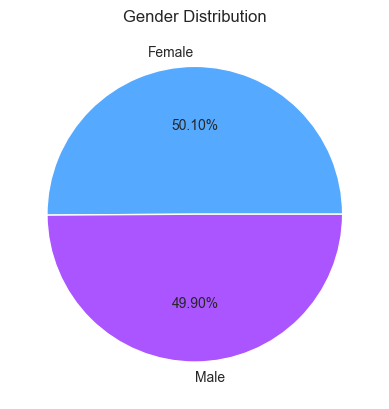

In [162]:
palette = sns.color_palette('cool',2)
plt.pie(gender.values,labels=gender.index,autopct='%1.2f%%',colors=palette,wedgeprops={'edgecolor':'white'})
plt.title('Gender Distribution')

In [163]:
total_sales_by_gender = df.groupby('Gender')['Total'].sum().reset_index()

Text(0, 0.5, 'Total Sales')

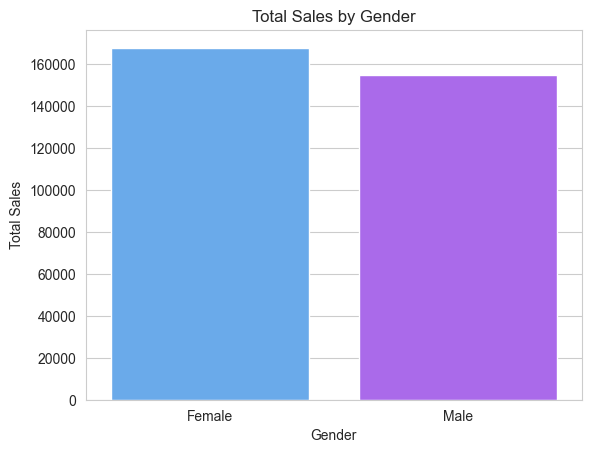

In [164]:
sns.barplot(x='Gender',y='Total',data=total_sales_by_gender,palette='cool')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')

In [165]:
customer_type = df['Customer type'].value_counts()

Text(0.5, 1.0, 'Customer Type Distribution')

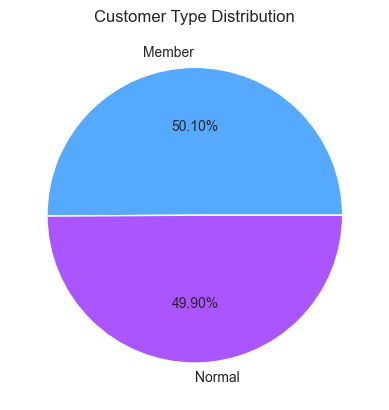

In [166]:
palette = sns.color_palette('cool',2)
plt.pie(customer_type.values,labels=customer_type.index,autopct='%1.2f%%',colors=palette,wedgeprops={'edgecolor':'white'})
plt.title('Customer Type Distribution')

In [167]:
sales_by_customer_type = df.groupby('Customer type')['Total'].sum().reset_index()

Text(0, 0.5, 'Total Sales')

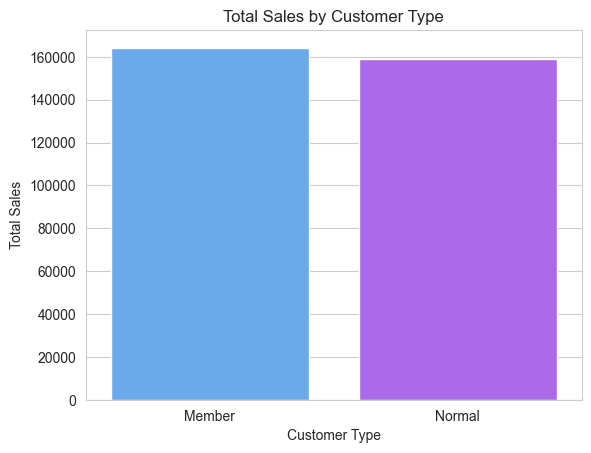

In [168]:
sns.barplot(x='Customer type',y='Total',data=sales_by_customer_type,palette='cool')
plt.title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

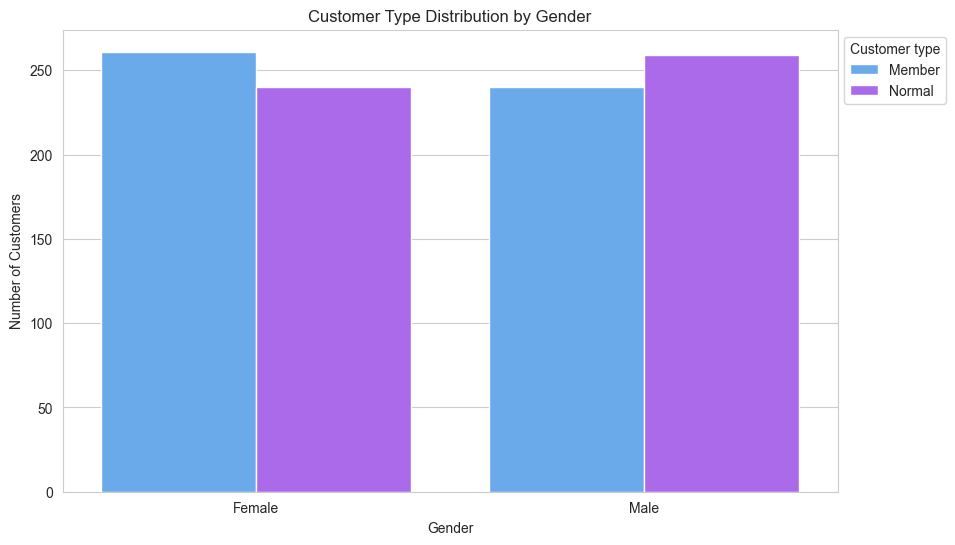

In [169]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Customer type', data=df,palette='cool')
plt.title('Customer Type Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Customer type', bbox_to_anchor=(1, 1))

### Sales by Product Line

In [170]:
total_sales_by_product_line = df.groupby('Product line')['Total'].sum().reset_index().sort_values(by='Total',ascending=False)

Text(0, 0.5, 'Product Line')

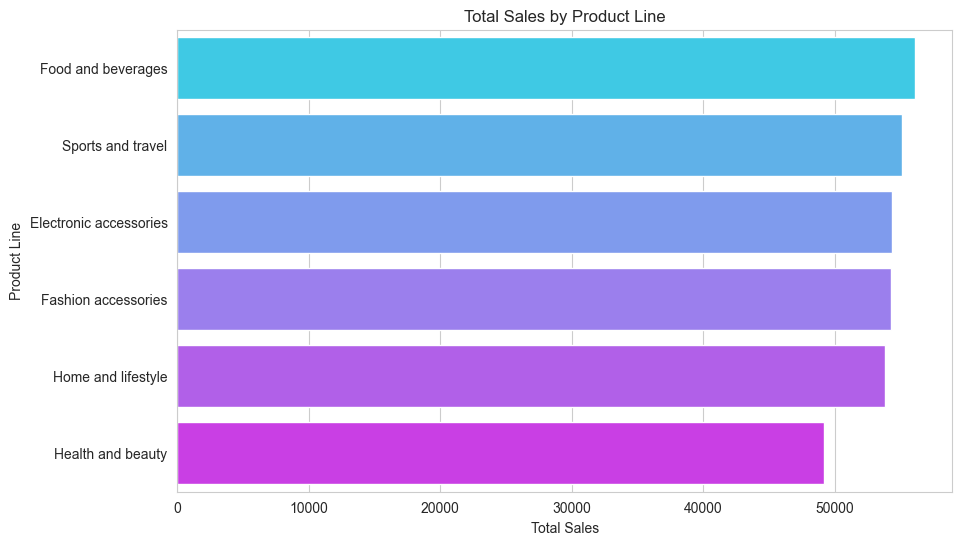

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total',y='Product line',data=total_sales_by_product_line,palette='cool')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')

### Sales Performance by Branch

In [172]:
total_sales = df.groupby('Branch')['Total'].sum().reset_index()

Text(0, 0.5, 'Total Sales')

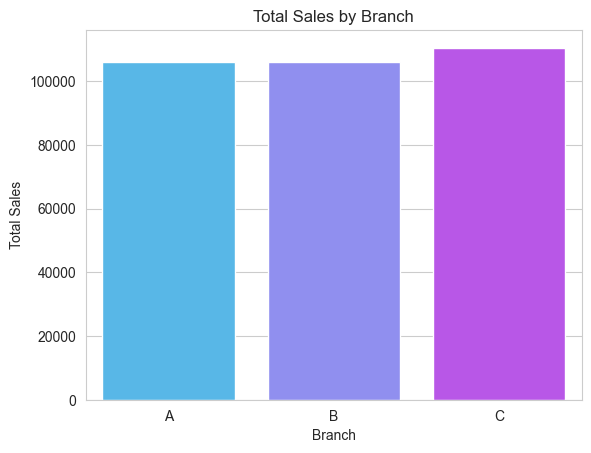

In [173]:
palette = sns.color_palette('cool',3)
sns.barplot(x='Branch',y='Total',data=total_sales,palette='cool')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')

In [174]:
gross = df.groupby('Branch')['gross income'].sum().reset_index()

Text(0, 0.5, 'Total Gross Income')

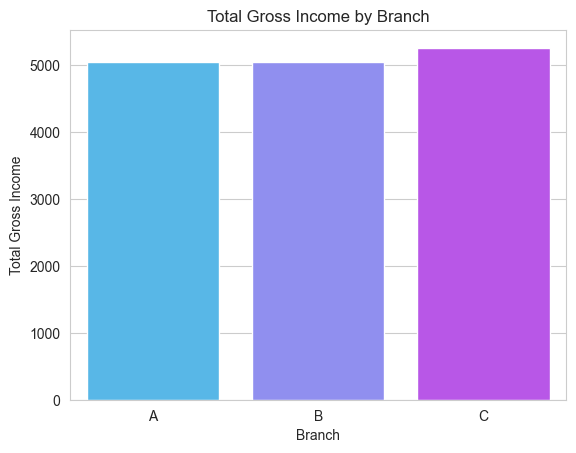

In [175]:
sns.barplot(x='Branch',y='gross income',data=gross,palette='cool')
plt.title('Total Gross Income by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Gross Income')

In [176]:
total_quantity = df.groupby('Branch')['Quantity'].sum().reset_index()

Text(0, 0.5, 'Total Quantity Sold')

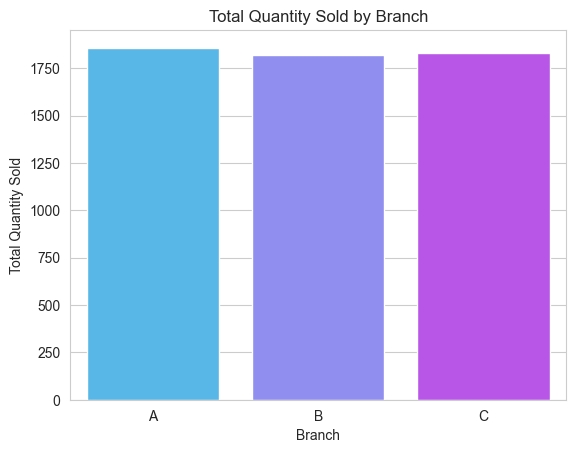

In [177]:
sns.barplot(x='Branch',y='Quantity',data=total_quantity,palette='cool')
plt.title('Total Quantity Sold by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Quantity Sold')

In [178]:
sales_by_branch_product_line = df.groupby(['Branch','Product line'])['Total'].sum().reset_index()

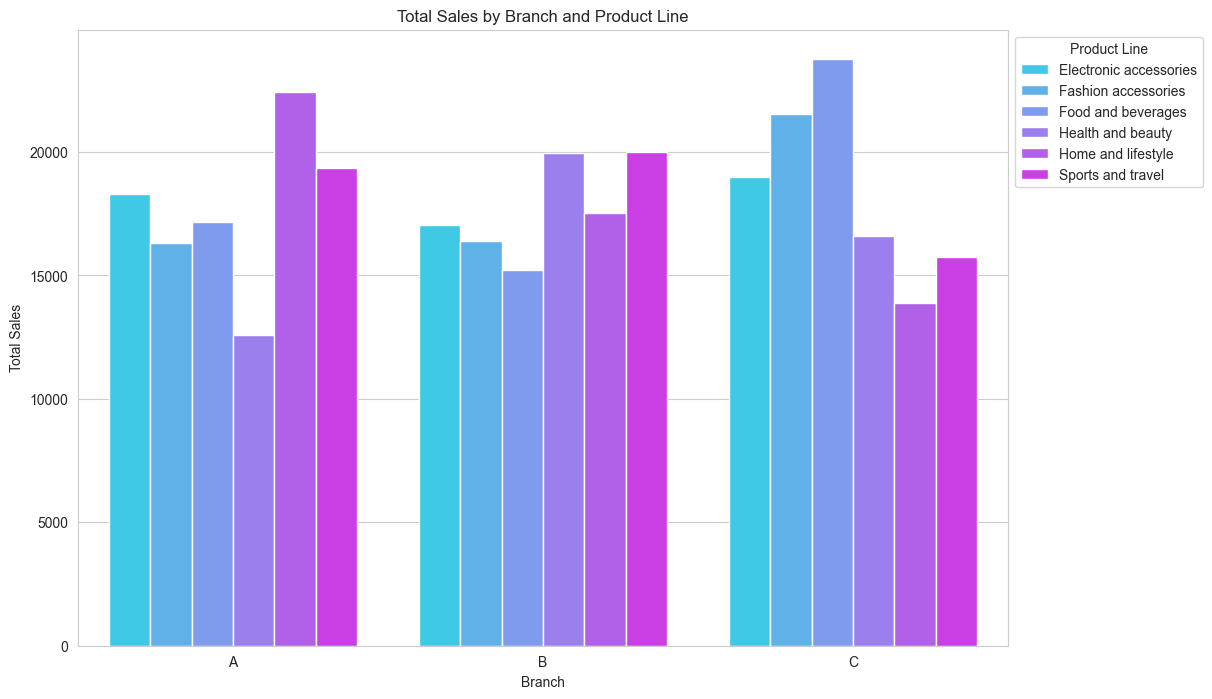

In [179]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Branch', y='Total', hue='Product line', data=sales_by_branch_product_line,palette='cool',edgecolor='White')
plt.title('Total Sales by Branch and Product Line')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.legend(title='Product Line', bbox_to_anchor=(1, 1))
plt.show()

In [180]:
sales_by_branch_customer_type = df.groupby(['Branch','Customer type'])['Total'].sum().reset_index()

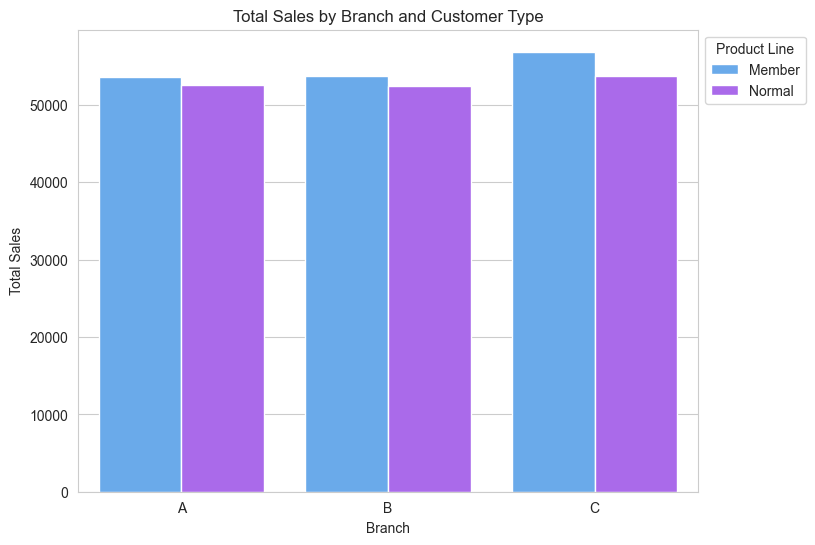

In [181]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Total', hue='Customer type', data=sales_by_branch_customer_type,palette='cool')
plt.title('Total Sales by Branch and Customer Type')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.legend(title='Product Line', bbox_to_anchor=(1, 1))

### Payment Method

In [182]:
payment_method = df.groupby('Payment')['Total'].sum().reset_index().sort_values(by='Total')

Text(0.5, 1.0, 'Percentage of payment method')

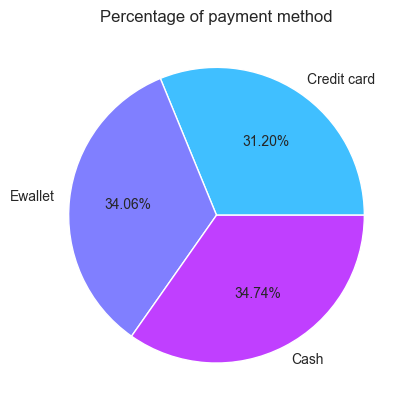

In [183]:
palette = sns.color_palette('cool',3)
plt.pie(payment_method['Total'],labels=payment_method['Payment'],autopct='%1.2f%%',colors=palette,wedgeprops={'edgecolor':'white'})
plt.title('Percentage of payment method')

In [184]:
payment_method_customer_type = df.groupby(['Payment', 'Customer type'])['Total'].sum().reset_index()

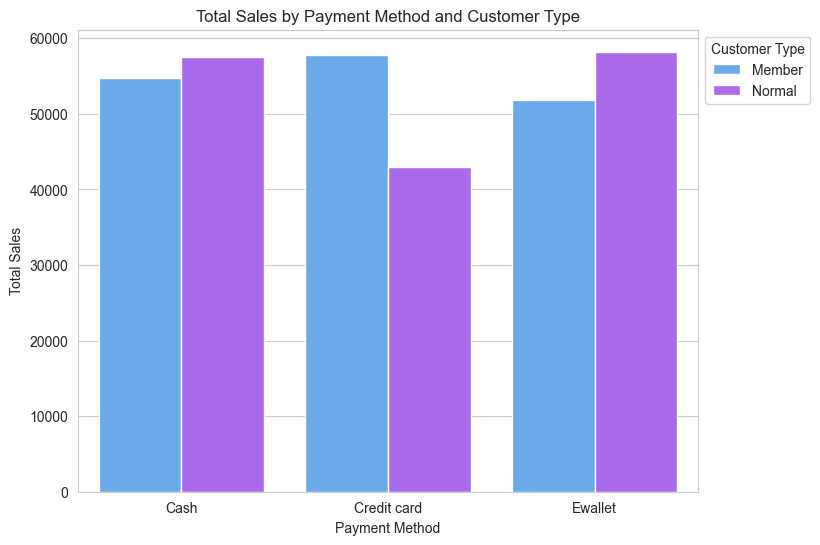

In [185]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Payment', y='Total', hue='Customer type',palette='cool', data=payment_method_customer_type)
plt.title('Total Sales by Payment Method and Customer Type')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.legend(title='Customer Type', bbox_to_anchor=(1, 1))
plt.show()

### Customer ratings

Text(0.5, 1.0, 'Distribution of Rating')

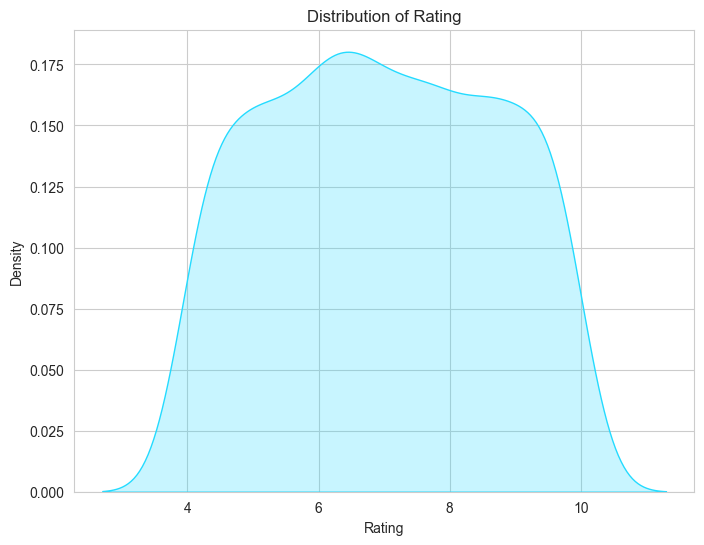

In [186]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['Rating'], fill=True)
plt.title('Distribution of Rating')

Text(0.5, 1.0, 'Distribution of Customer Ratings by Branch')

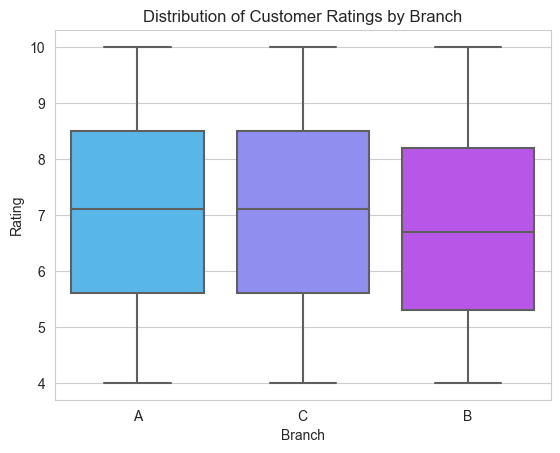

In [187]:
sns.boxplot(x='Branch',y='Rating',data=df,palette='cool')
plt.title('Distribution of Customer Ratings by Branch')

In [188]:
ratings_by_branch = df.groupby('Branch')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

Text(0.5, 1.0, 'Average Customer Ratings by Branch')

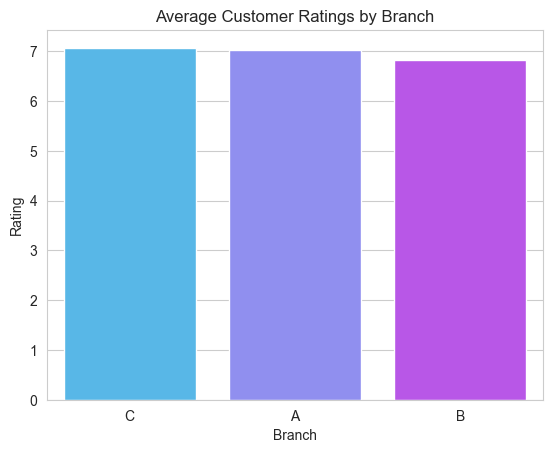

In [189]:
sns.barplot( x='Branch',y='Rating', data=ratings_by_branch,palette='cool')
plt.title('Average Customer Ratings by Branch')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

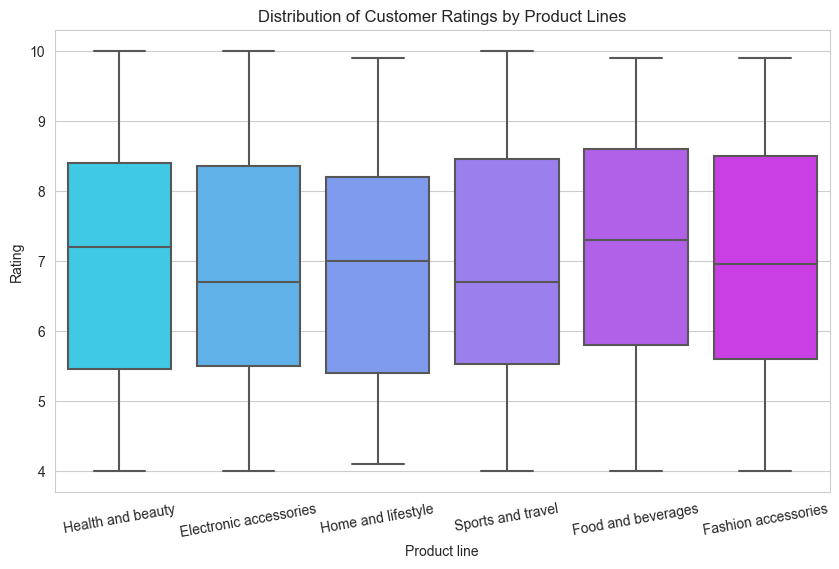

In [190]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line',y='Rating',data=df,palette='cool')
plt.title('Distribution of Customer Ratings by Product Lines')
plt.xticks(rotation=10) 

In [191]:
ratings_by_product_line = df.groupby('Product line')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

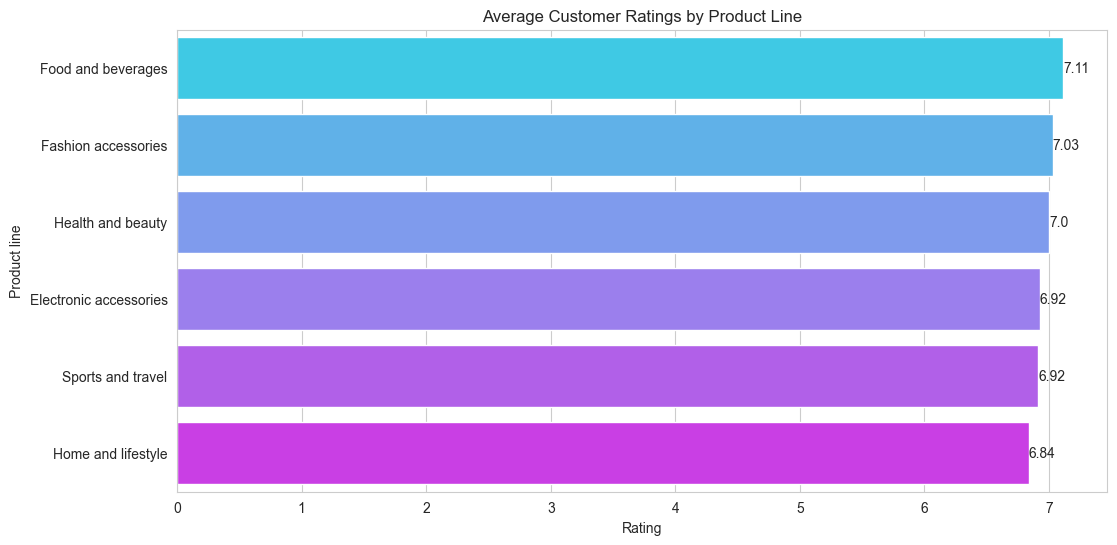

In [192]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Product line', data=ratings_by_product_line,palette='cool')
plt.title('Average Customer Ratings by Product Line')
for index, value in enumerate(ratings_by_product_line['Rating']):
    plt.text(value, index, str(round(value, 2)), va='center')

Text(0.5, 1.0, 'Distribution of Customer Ratings by Payment Method')

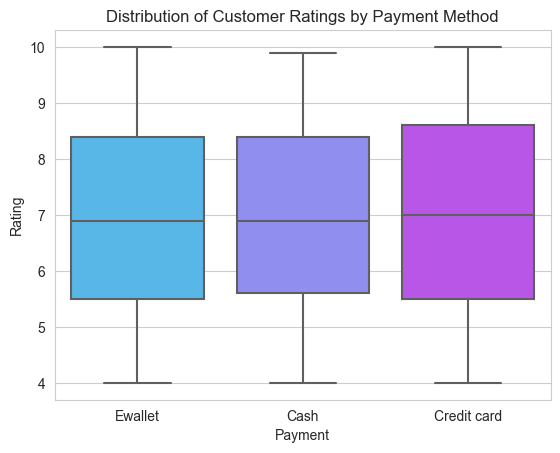

In [193]:
sns.boxplot(x='Payment',y='Rating',data=df,palette='cool')
plt.title('Distribution of Customer Ratings by Payment Method')

In [194]:
ratings_by_payment = df.groupby('Payment')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

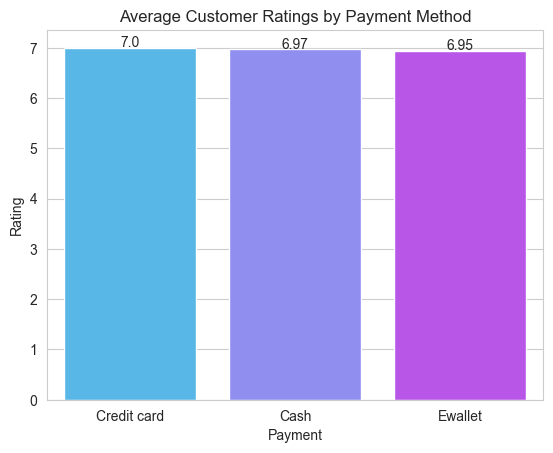

In [195]:
sns.barplot(x='Payment',y='Rating', data=ratings_by_payment,palette='cool')
plt.title('Average Customer Ratings by Payment Method')
for index, value in enumerate(ratings_by_payment['Rating']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

### Sales by Month

In [196]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

In [197]:
total_sales_by_month = df.groupby('month')['Total'].sum().reset_index()

Text(0.5, 1.0, 'Total Sales by Month')

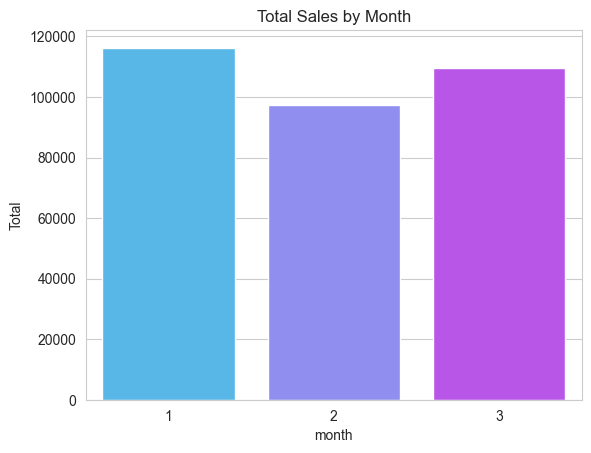

In [198]:
sns.barplot(x='month',y='Total', data=total_sales_by_month,palette='cool')
plt.title('Total Sales by Month')

In [199]:
sales_by_month_product_line = df.groupby(['month','Product line'])['Total'].sum().reset_index().sort_values(by=['month','Total'],ascending=[True,False])

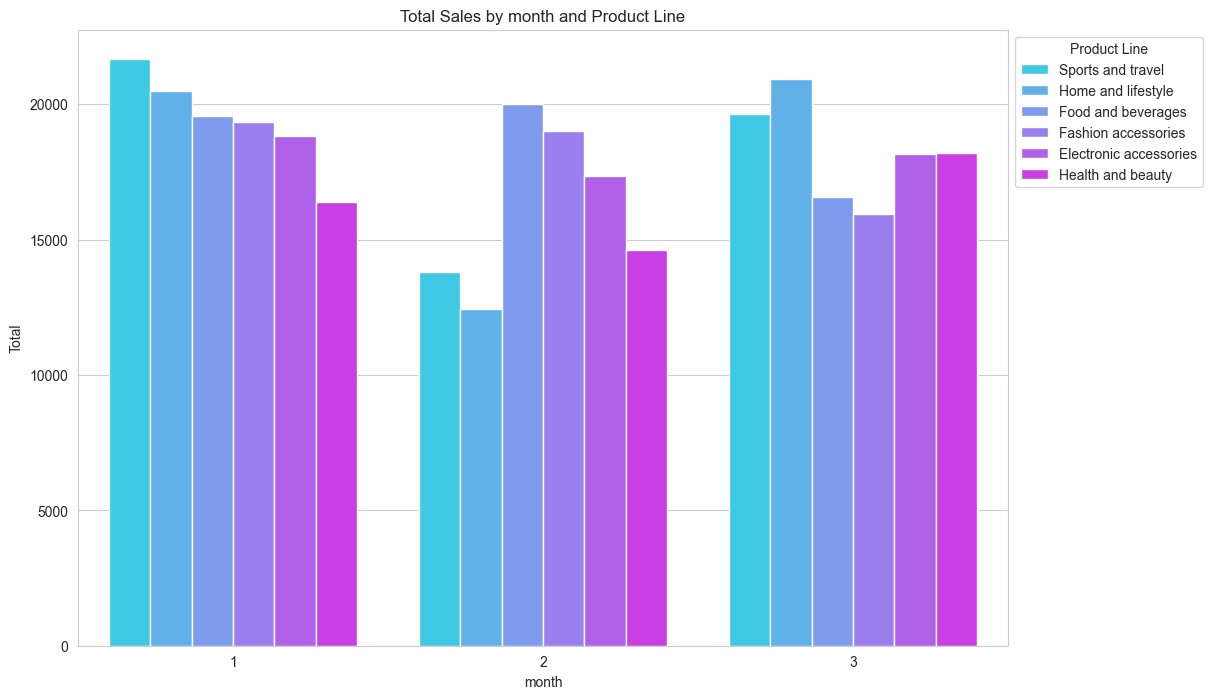

In [200]:
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='Total', hue='Product line', data=sales_by_month_product_line,palette='cool')
plt.title('Total Sales by month and Product Line')
plt.legend(title='Product Line', bbox_to_anchor=(1, 1))

### Daily Gross Income by Branch

In [201]:
branches = df['Branch'].unique()
branches.sort()

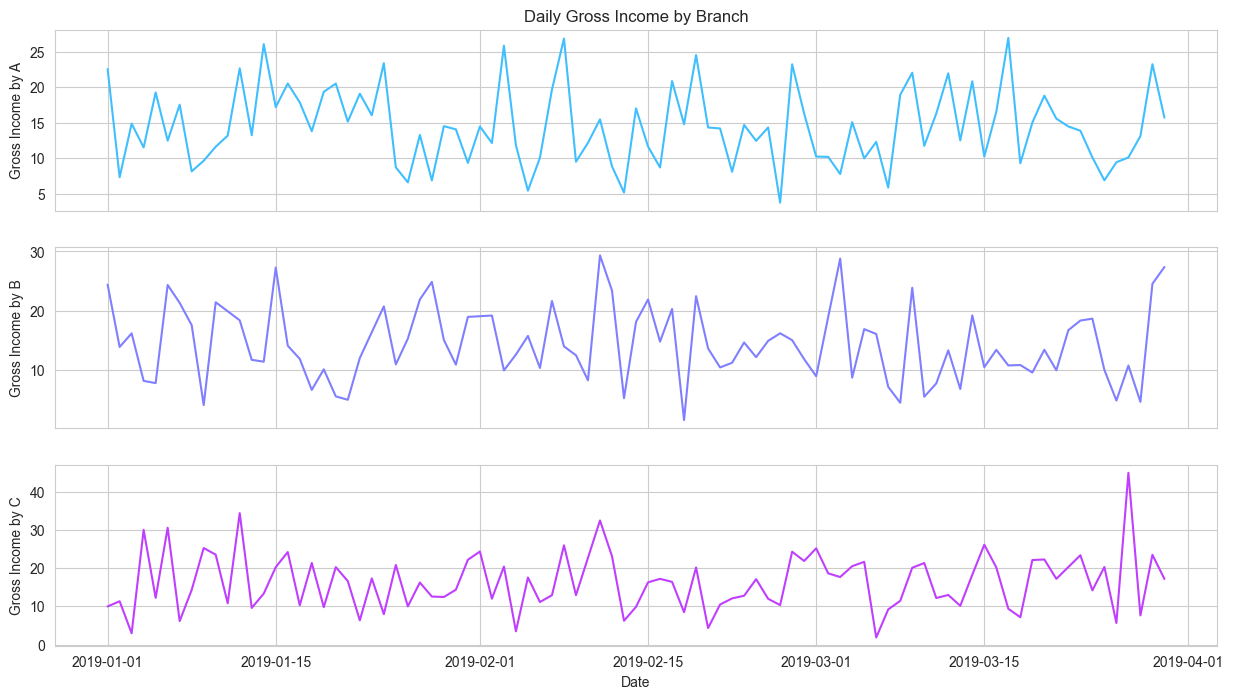

In [207]:
fig, axes = plt.subplots(3, 1, figsize=(15, 8), sharex=True)
for i,val in enumerate(branches):
    sns.lineplot(x='Date', y='gross income', data=df[df['Branch'] == val], ax=axes[i], color=palette[i],errorbar=None)
    axes[i].set_ylabel(f'Gross Income by {val}')
axes[0].set_title('Daily Gross Income by Branch')
axes[2].set_xlabel('Date')
plt.show()

### Distribution of Time Sales

Text(0.5, 0, 'Hours of Day')

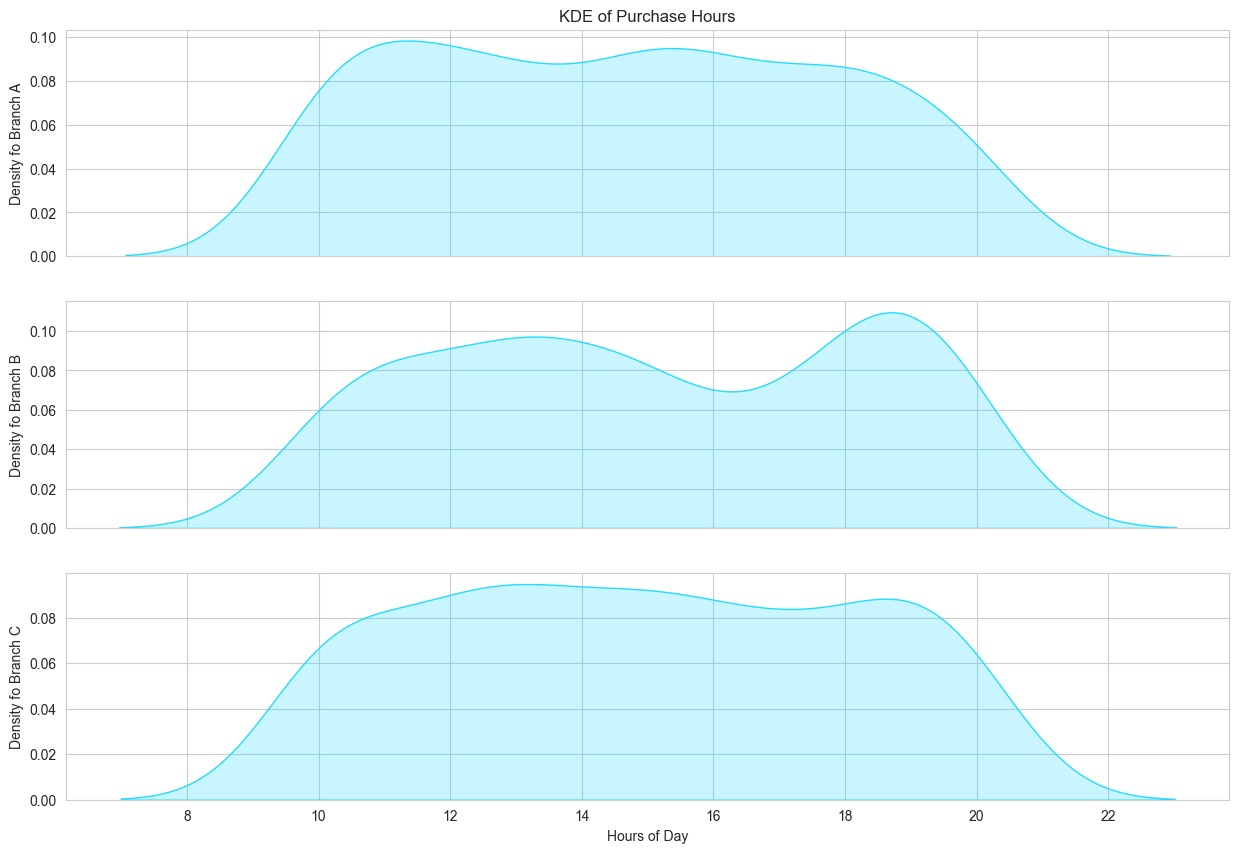

In [210]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, branch in enumerate(branches):
    sns.kdeplot(df[df['Branch'] == branch]['Hour'], ax=axes[i], fill=True)
    axes[0].set_title(f'KDE of Purchase Hours')
    axes[i].set_ylabel(f'Density fo Branch {branch}')
axes[2].set_xlabel('Hours of Day')